In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [37]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [38]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [40]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [41]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


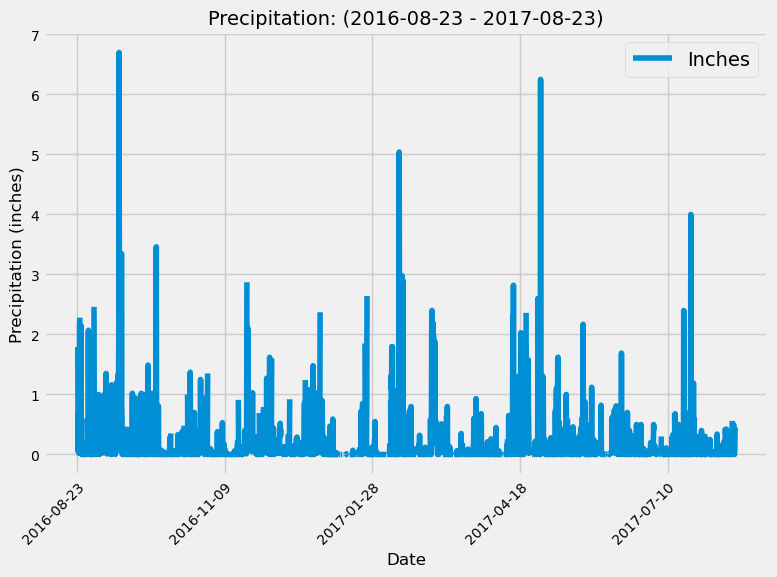

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date = dt.datetime.strptime(recent_date[0], "%Y-%m-%d").date()
date_range = recent_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
prcp_12mos = session.query(Measurement).filter(Measurement.date >= date_range).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_12mos_df = pd.DataFrame([(m.date, m.prcp) for m in prcp_12mos], columns=["Date", "Inches"]).set_index("Date")


# Sort the dataframe by date
prcp_12mos_df = prcp_12mos_df.sort_values(by="Date", ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data
prcp_12mos_df.plot(figsize=(8,6), label="Precipitation")

plt.xticks(rotation=45, rotation_mode="anchor", fontsize=10, ha="right")
plt.yticks(fontsize=10)
plt.title(f"Precipitation: ({date_range} - {recent_date})", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Precipitation (inches)", fontsize=12)
plt.tight_layout()
plt.legend(loc="best")

plt.savefig(f"images/Precipitation_{date_range}_{recent_date}.png")

plt.show()


In [43]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_12mos_df.describe()

,Inches
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).count()
station_count

9

In [45]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count()).group_by(Measurement.station).order_by(func.count().desc()).all()
active_stations



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_most = active_stations[0][0]
active_station_summery = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter_by(station = active_station_most).all()
active_station_summery

[(54.0, 85.0, 71.66378066378067)]

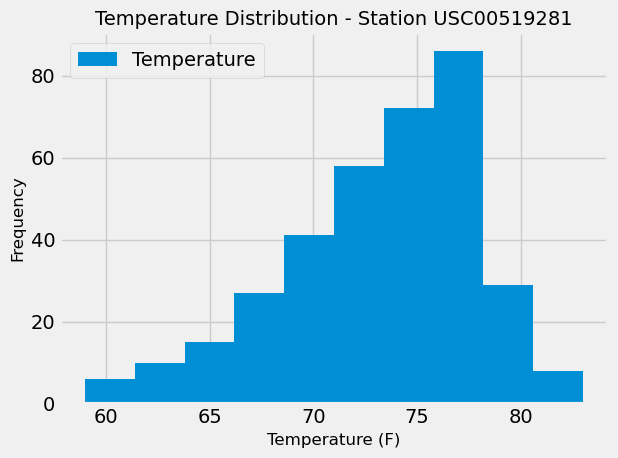

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_12mos = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == active_station_most).filter(Measurement.date >= date_range).all()
active_station_12mos_df = pd.DataFrame([(m.date, m.tobs) for m in active_station_12mos], columns=["Date", "Temperature"])

active_station_12mos_df.plot(kind="hist")

plt.title(f"Temperature Distribution - Station {active_station_most}", fontsize=14)
plt.xlabel("Temperature (F)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.legend(loc="best")

plt.savefig(f"images/Station-{active_station_most}_histogram.png")

plt.show()



# Close Session

In [48]:
# Close Session
session.close()